In [1]:
# import dependencies
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
# import the time module
import time
# import the API key
from config import weather_api_key

In [2]:
# create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# create a list to hold the cities
cities = []

# identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # if the city is unique, add it to cities[]
    if city not in cities:
        cities.append(city)

#print the length of the cities list to confirm sufficient count
len(cities)


625

In [5]:
# starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# create an empty list to hold the weather data
city_data = []
# print the beginning of the logging.
print("Beginning Data Retrieval")
print("-----------------------------")

# create counters
record_count = 1
set_count = 1

# loop through all the cities in our list
for i, city in enumerate(cities):
    
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
    # create endpoint url with each city
    city_url = url + "&q=" + city#.replace(" ", "+")
    
    # log the url, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #increase record count
    record_count += 1

# run an API request for each of the cities.
    try:
        # parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # convert the date to iso standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    # if an error occurs, skip city
    except:
        print("City not found. Skipping. . .")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | mys shmidta
City not found. Skipping. . .
Processing Record 7 of Set 1 | gotsu
Processing Record 8 of Set 1 | dibulla
Processing Record 9 of Set 1 | teguise
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | antsohihy
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | santiago del estero
Processing Record 14 of Set 1 | alofi
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | edgewater
Processing Record 19 of Set 1 | whitehorse
Processing Record 20 of Set 1 | jinchang
Processing Record 21 of Set 1 | krasnoselkup
Processing Record 22 of Set 1 | narsaq
Processing Re

Processing Record 39 of Set 4 | mujiayingzi
Processing Record 40 of Set 4 | portland
Processing Record 41 of Set 4 | jalu
Processing Record 42 of Set 4 | aloleng
Processing Record 43 of Set 4 | kamenskoye
City not found. Skipping. . .
Processing Record 44 of Set 4 | leningradskiy
Processing Record 45 of Set 4 | zakharo
City not found. Skipping. . .
Processing Record 46 of Set 4 | gibsons
Processing Record 47 of Set 4 | shingu
Processing Record 48 of Set 4 | denpasar
Processing Record 49 of Set 4 | chernyakhiv
Processing Record 50 of Set 4 | guarapari
Processing Record 1 of Set 5 | new norfolk
Processing Record 2 of Set 5 | perth
Processing Record 3 of Set 5 | vilhena
Processing Record 4 of Set 5 | lata
Processing Record 5 of Set 5 | eenhana
Processing Record 6 of Set 5 | beloha
Processing Record 7 of Set 5 | griffith
Processing Record 8 of Set 5 | totma
Processing Record 9 of Set 5 | kavieng
Processing Record 10 of Set 5 | banyumas
Processing Record 11 of Set 5 | broken hill
Processing

Processing Record 28 of Set 8 | coari
Processing Record 29 of Set 8 | beidao
Processing Record 30 of Set 8 | ushtobe
Processing Record 31 of Set 8 | chuncheng
Processing Record 32 of Set 8 | viedma
Processing Record 33 of Set 8 | progreso
Processing Record 34 of Set 8 | martin
Processing Record 35 of Set 8 | ust-tsilma
Processing Record 36 of Set 8 | craig
Processing Record 37 of Set 8 | honningsvag
Processing Record 38 of Set 8 | netanya
Processing Record 39 of Set 8 | araouane
Processing Record 40 of Set 8 | naze
Processing Record 41 of Set 8 | tabuk
Processing Record 42 of Set 8 | rawannawi
City not found. Skipping. . .
Processing Record 43 of Set 8 | bandarbeyla
Processing Record 44 of Set 8 | severo-yeniseyskiy
Processing Record 45 of Set 8 | camocim de sao felix
Processing Record 46 of Set 8 | aktau
Processing Record 47 of Set 8 | havelock
Processing Record 48 of Set 8 | boa vista
Processing Record 49 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 50 of Set 8 | ostrovnoy


Processing Record 17 of Set 12 | dalbandin
Processing Record 18 of Set 12 | carbonia
Processing Record 19 of Set 12 | la asuncion
Processing Record 20 of Set 12 | kuche
City not found. Skipping. . .
Processing Record 21 of Set 12 | rio grande
Processing Record 22 of Set 12 | iida
Processing Record 23 of Set 12 | carmen
Processing Record 24 of Set 12 | kayes
Processing Record 25 of Set 12 | leo
Processing Record 26 of Set 12 | mahibadhoo
Processing Record 27 of Set 12 | santa rosa
Processing Record 28 of Set 12 | nizwa
Processing Record 29 of Set 12 | egvekinot
Processing Record 30 of Set 12 | port hawkesbury
Processing Record 31 of Set 12 | maniitsoq
Processing Record 32 of Set 12 | bhadrapur
Processing Record 33 of Set 12 | sanica
Processing Record 34 of Set 12 | galich
Processing Record 35 of Set 12 | neuquen
Processing Record 36 of Set 12 | sulphur springs
Processing Record 37 of Set 12 | bodden town
Processing Record 38 of Set 12 | takhtamygda
Processing Record 39 of Set 12 | tubru

In [6]:
print(len(cities))

625


In [7]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,53.22,66,40,35.68,AR,2021-10-18 19:45:33
1,Kodiak,57.7900,-152.4072,44.28,87,90,18.41,US,2021-10-18 19:42:40
2,Tuktoyaktuk,69.4541,-133.0374,19.40,93,75,8.05,CA,2021-10-18 19:43:52
3,Hilo,19.7297,-155.0900,77.79,88,90,5.75,US,2021-10-18 19:41:46
4,Mataura,-46.1927,168.8643,43.39,98,100,7.72,NZ,2021-10-18 19:45:39
5,Gotsu,35.0000,132.2167,55.40,76,100,4.54,JP,2021-10-18 19:46:42
6,Dibulla,11.2725,-73.3091,83.23,82,48,5.12,CO,2021-10-18 19:46:42
7,Teguise,29.0605,-13.5640,71.82,78,0,3.44,ES,2021-10-18 19:46:43
8,Nikolskoye,59.7035,30.7861,39.09,95,24,6.04,RU,2021-10-18 19:46:31
9,Antsohihy,-14.8796,47.9875,77.14,61,71,5.48,MG,2021-10-18 19:46:43


In [8]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [9]:
city_data_df.tail(20)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
557,Mogocha,RU,2021-10-18 19:50:47,53.7333,119.7667,23.43,66,100,3.49
558,Darovskoy,RU,2021-10-18 19:50:48,58.7700,47.9564,35.26,95,100,12.26
559,Alice Springs,AU,2021-10-18 19:48:32,-23.7000,133.8833,69.35,28,84,0.00
560,Pakxan,LA,2021-10-18 19:50:49,18.3778,103.6601,69.08,87,100,3.09
561,Iguape,BR,2021-10-18 19:50:50,-24.7081,-47.5553,66.15,91,100,12.73
562,Les Cayes,HT,2021-10-18 19:50:50,18.2000,-73.7500,85.08,69,100,4.56
563,Linxia,CN,2021-10-18 19:50:51,35.6003,103.2064,39.18,93,100,2.33
564,Hofn,IS,2021-10-18 19:49:37,64.2539,-15.2082,48.22,81,90,13.80
565,Gagino,RU,2021-10-18 19:50:52,55.2314,45.0339,35.96,86,82,7.02
566,Muroto,JP,2021-10-18 19:50:52,33.2833,134.1500,65.28,64,62,6.51


In [37]:
# create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# export the city_data into a .csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# begin cells about relationship between latitude and temperature

In [12]:
# extract relevant fields from the dataframe for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

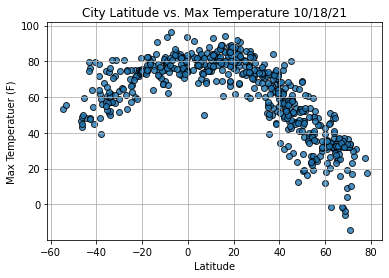

In [13]:
# build scatter plot for latitude vs max temperature
plt.scatter(lats, max_temps, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# incorportate other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperatuer (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig1.png")

# show plot
plt.show()

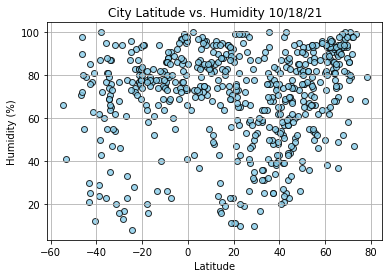

In [14]:
# build scatter plot for latitude vs humidity
plt.scatter(lats, humidity, c='skyblue', edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# incorportate other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig2.png")

# show plot
plt.show()

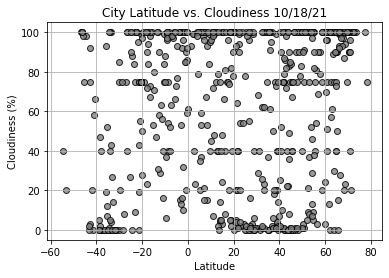

In [15]:
# build scatter plot for latitude vs cloudiness
plt.scatter(lats, cloudiness, c='gray', edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# incorportate other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig3.png")

# show plot
plt.show()

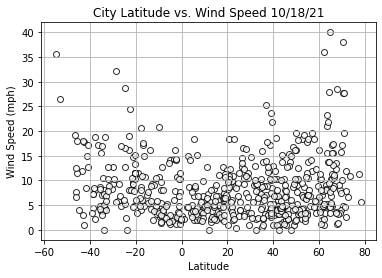

In [16]:
# build scatter plot for latitude vs wind speed
plt.scatter(lats, wind_speed, c='white', edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# incorportate other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig4.png")

# show plot
plt.show()

In [17]:
# import linregress
from scipy.stats import linregress

# create a function to perform linear regression on the weather data
# and plot a regression line and teh equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # get the equation of the line.
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    
    # annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [18]:
index13 = city_data_df.loc[13]
index13

City                    Jamestown
Country                        US
Date          2021-10-18 19:44:08
Lat                        42.097
Lng                      -79.2353
Max Temp                    57.52
Humidity                       57
Cloudiness                     75
Wind Speed                   5.99
Name: 13, dtype: object

In [19]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
572     True
573    False
574     True
575    False
576     True
Name: Lat, Length: 577, dtype: bool

In [20]:
# create Northern and southern dfs
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

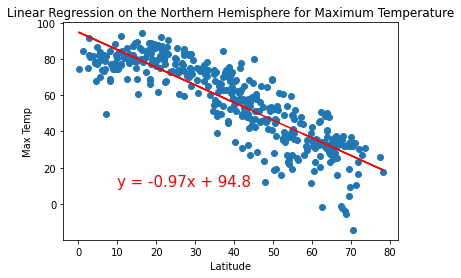

In [21]:
# linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (10,10))

In [22]:
linregress(x_values, y_values)

LinregressResult(slope=-0.9723514773414427, intercept=94.80409436036592, rvalue=-0.8652493716138504, pvalue=1.3057604081609808e-122, stderr=0.028099772901727754, intercept_stderr=1.235019738515509)

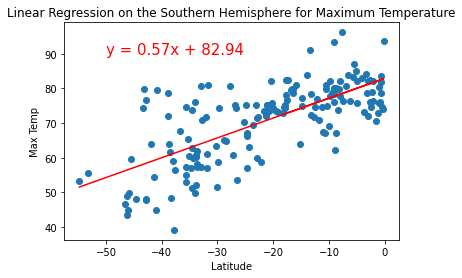

In [23]:
# linear regression on the southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (-50,90))

In [24]:
linregress(x_values, y_values)

LinregressResult(slope=0.5735497050140176, intercept=82.93569182879405, rvalue=0.7109505289426162, pvalue=6.101945166718441e-28, stderr=0.04338488389512845, intercept_stderr=1.1014108094237984)

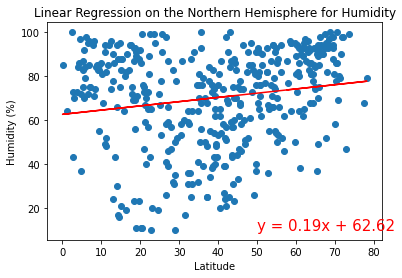

In [25]:
# linear regression on the Northern Hemisphere Humidity
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Humidity', 'Humidity (%)', (50,10))

In [26]:
# r values
linregress(x_values, y_values)

LinregressResult(slope=0.19285202983027477, intercept=62.61785849337625, rvalue=0.1739335304226158, pvalue=0.0004447577901154274, stderr=0.05445742805930395, intercept_stderr=2.3934712496517503)

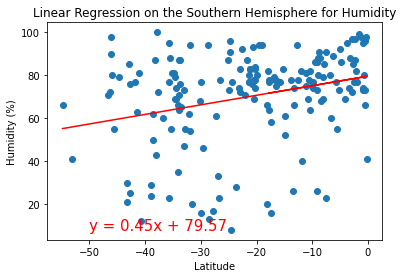

In [27]:
# linear regression on the southern Hemisphere for humidity
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Humidity', 'Humidity (%)', (-50,8))

In [28]:
# r values
linregress(x_values, y_values)

LinregressResult(slope=0.44530983841042865, intercept=79.5709315029345, rvalue=0.28426575447443814, pvalue=0.00015045144983598044, stderr=0.1148531845408627, intercept_stderr=2.9157745185128134)

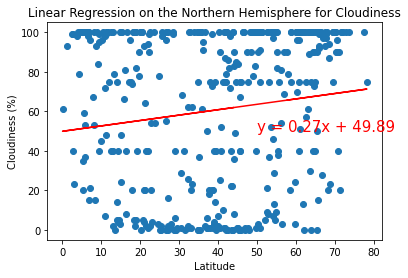

In [29]:
# linear regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Cloudiness', 'Cloudiness (%)', (50,50))

In [30]:
# r values
linregress(x_values, y_values)

LinregressResult(slope=0.273132666727571, intercept=49.889971740149946, rvalue=0.13724336173208831, pvalue=0.0057255875170245, stderr=0.0983196063376667, intercept_stderr=4.321268180164789)

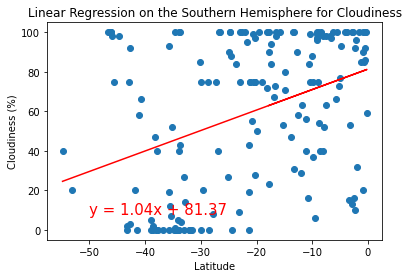

In [31]:
# linear regression on the southern Hemisphere for cloudiness
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Cloudiness', 'Cloudiness (%)', (-50,8))

In [32]:
# r values
linregress(x_values, y_values)

LinregressResult(slope=1.0362738153779403, intercept=81.36917913969724, rvalue=0.37732432523223625, pvalue=3.097994721591436e-07, stderr=0.19449602242633912, intercept_stderr=4.937664971240306)

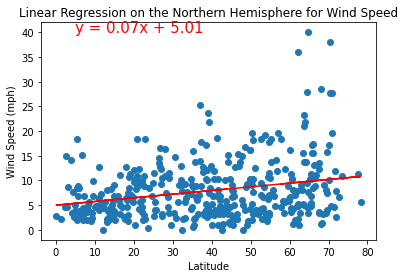

In [33]:
# linear regression on the Northern Hemisphere Wind Speed
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed (mph)', (5,40))

In [34]:
# r values
linregress(x_values, y_values)

LinregressResult(slope=0.07425826954050363, intercept=5.0083530027206375, rvalue=0.2511206114258293, pvalue=3.1540941045625554e-07, stderr=0.0142759482884314, intercept_stderr=0.6274455663360684)

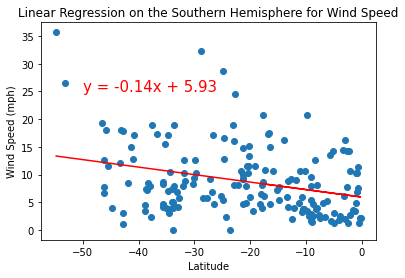

In [35]:
# linear regression on the southern Hemisphere for Wind Speed
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed (mph)', (-50,25))

In [36]:
# r values
linregress(x_values, y_values)

LinregressResult(slope=-0.13509500904081975, intercept=5.93131495206905, rvalue=-0.3029333281384707, pvalue=5.095836476937757e-05, stderr=0.03250068012144617, intercept_stderr=0.8250938388106523)